In [398]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [399]:
#loding dataset
from sklearn.datasets import load_iris
iris=load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [400]:
#indepenedent and dependet dataset
x=pd.DataFrame( iris['data'],columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)'])
y=iris['target']

In [401]:
x.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [402]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [403]:
#splitting into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [404]:
#apllying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalu

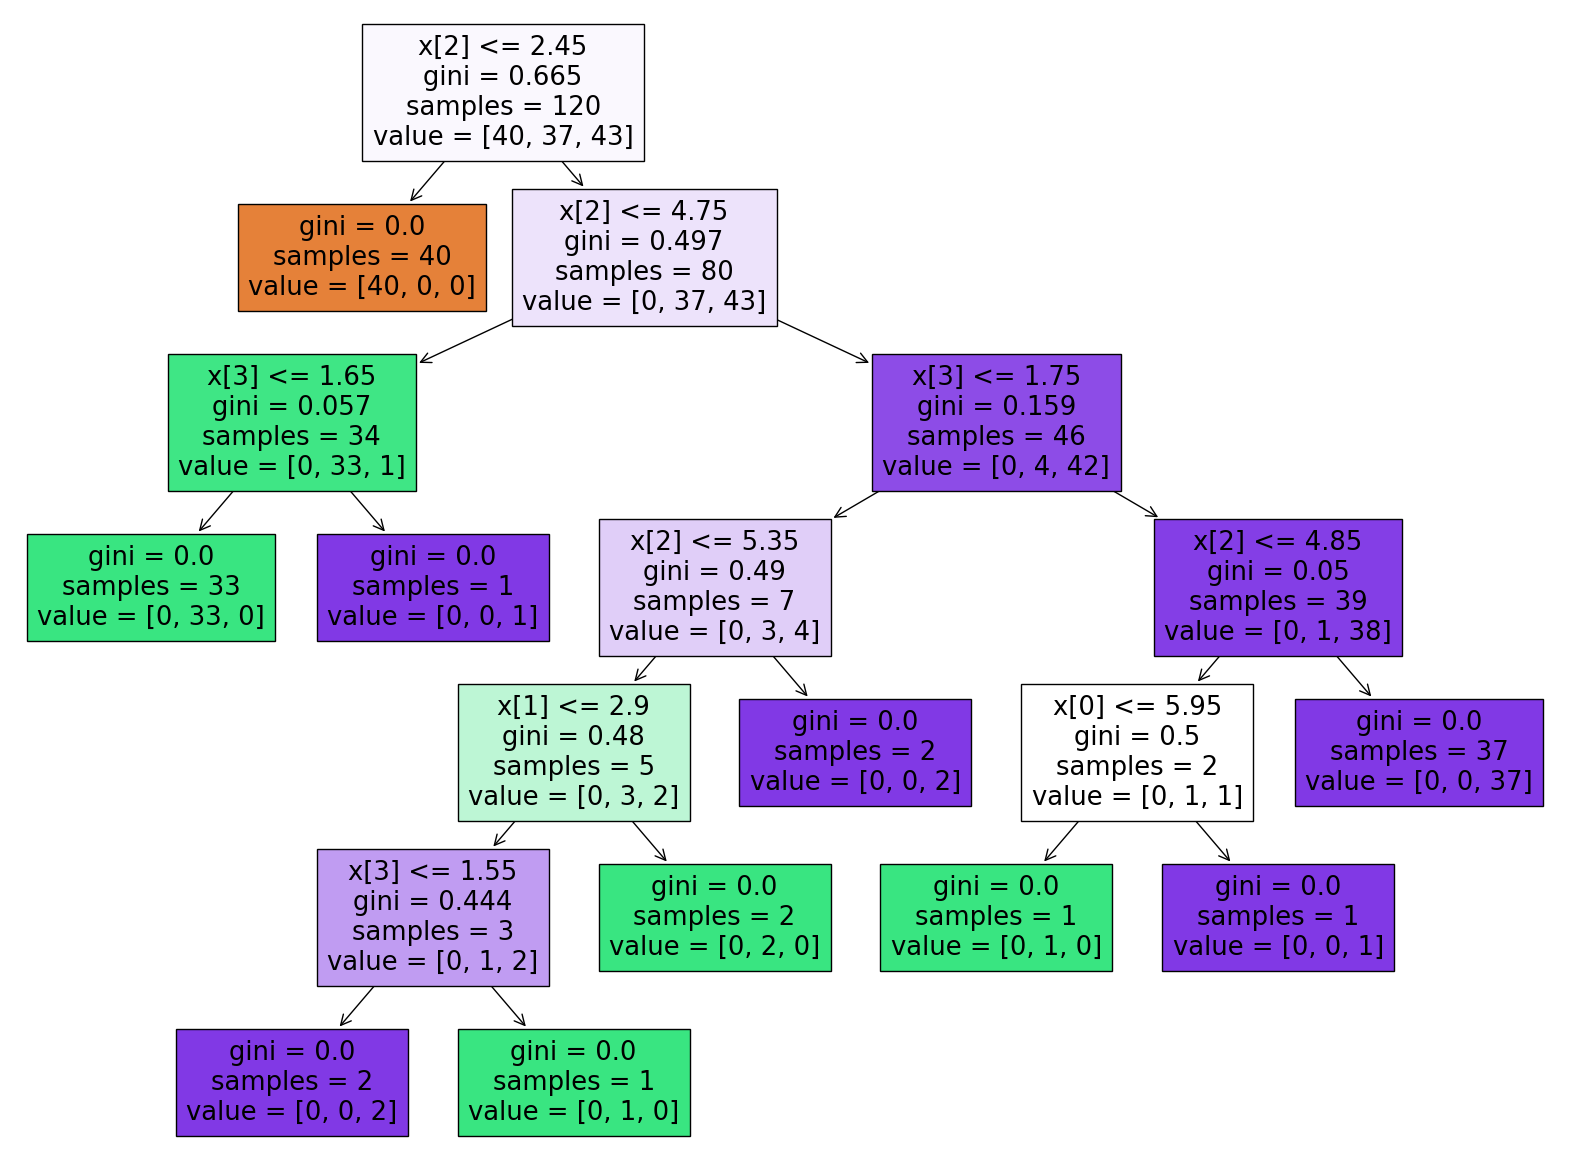

In [405]:
#visualizing the decission tree
from sklearn import    tree
plt.figure(figsize=(20,15))
tree.plot_tree(classifier,filled=True)

In [406]:
y_pred=classifier.predict(x_test)

In [407]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



Note:- model is overfitted

# Post pruning

In [408]:
#apllying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

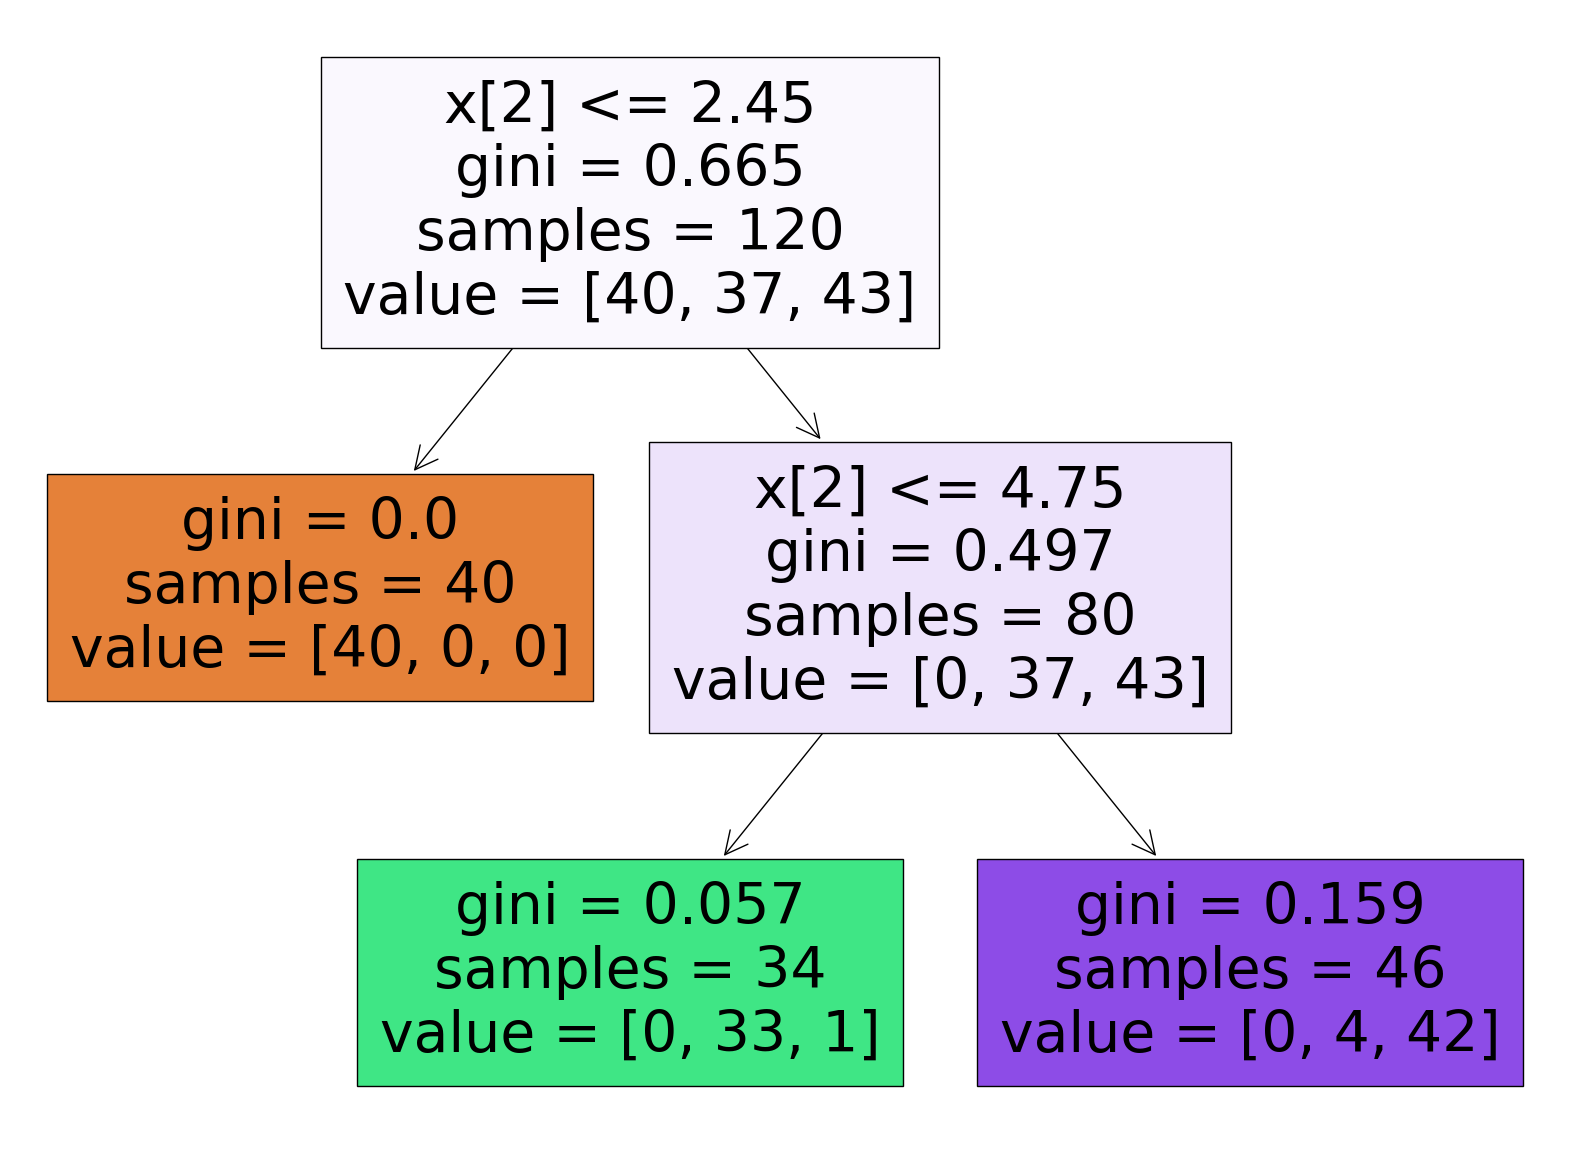

In [409]:
#visualizing the decission tree
from sklearn import    tree
plt.figure(figsize=(20,15))
tree.plot_tree(classifier,filled=True)

In [410]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred)) 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



# Decision Tree Classifier Prepruning And Hyperparameter Tuning

In [411]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [412]:
treemodel=DecisionTreeClassifier()

In [413]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=treemodel,param_grid=param,cv=5,scoring='accuracy')

In [414]:

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [415]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [416]:
grid.best_score_

0.95

In [417]:
y_pred=grid.predict(x_test)

In [418]:
y_pred

array([2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2])

In [419]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8333333333333334
[[10  0  0]
 [ 0 10  3]
 [ 0  2  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.77      0.80        13
           2       0.62      0.71      0.67         7

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.84        30

